# Дополнительное задание

Реализуйте одномерный поиск с учетом условий Вольфе и исследуйте его эффективность. Сравните полученные результаты с реализованными ранее методами.

## Инициализация

### Импорт библиотек

In [140]:
# Для анимаций
from matplotlib import rc
rc('animation', html='jshtml')
from matplotlib.animation import FuncAnimation

# Для больших анимаций
import matplotlib as mpl
mpl.rcParams['animation.embed_limit'] = 1000.0 

# Для графиков и прочего
import numpy as np
import scipy
from matplotlib import cm
import matplotlib.pyplot as plt
import math
import pandas as pd

# Для корректного отображения 
%matplotlib inline
plt.style.use('fivethirtyeight')

# Для таблиц
import csv 

# Для работы с файлами
import os, sys

# Для progress bar
from tqdm import tqdm

### Градиент

In [141]:
def grad(f, x, delta=1e-9):
    """
    Функция вычисления градиента в заданной точке с константной точностью

    Аргументы:
    f -- функция
    x -- точка

    Возвращает:
    ans -- градиент функции в точке x
    """

    n = len(x)
    xd = np.copy(x)
    ans = np.zeros(n)

    for i in range(n):
        xd[i] += delta
        ans[i] = np.divide(f(xd) - f(x), delta)
        xd[i] -= delta

    return ans

### Генерация квадратичной функции из пятого задания

In [142]:
def generate_random_matrix_simple(n, k, eps):
    # eps -- неиспользуемое значение, необходимо для соответствия другим функциям генераторам
    A = np.zeros((n, n))
    A[0,0] = np.random.uniform(low=1, high=2)
    A[n-1, n-1] = A[0,0] / k

    for i in range(0, n-2):
        A[i, i] = np.random.uniform(low=A[0,0], high=A[n-1, n-1])

    return A

# облегченная версия generate_random_matrix_simple
def generate_random_vector_simple(n, k):
    global v
    v = np.zeros((n))
    v[0] = np.random.uniform(low=1, high=2)
    v[n-1] = v[0] / k

    for i in range(0, n-2):
        v[i] = np.random.uniform(low=v[0], high=v[n-1])

    return v

def generate_quadratic_function_simple(n, k):
    # Генерируем случайную матрицу размера n x n, и числом обусловленности k
    v = generate_random_vector_simple(n, k)

    # Определяем квадратичную функцию f(x) = x * A * x^T
    def f(x):
        return sum([v[i]*(x[i]**2) for i in range(len(v))])
    
    return f

### Отрисовка пространства

In [143]:
def init():
    global X, Y, Z, f, x0
    Z = np.vectorize(lambda x, y: f(np.array([x, y])))(X, Y)

### 3D визуализация функции

In [144]:
def print_f(elev=30, azim=60):
  # Создание фигуры и трехмерной оси
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(111, projection='3d')

  # Установка угол обзора
  ax.view_init(elev=elev, azim=azim)

  # Построение поверхности
  ax.plot_surface(X, Y, Z)

  # Построение начальной точки
  ax.plot(x0[0], x0[1], f(x0), 'ro', label='Начальная точка')

  # Установка отступа между графиком и значениями осей
  ax.tick_params(pad=10)

  # Добавление легенды
  plt.legend(loc='upper left')

  # Установка размера шрифта для подписей осей
  ax.tick_params(axis='x', labelsize=10)
  ax.tick_params(axis='y', labelsize=10)
  ax.tick_params(axis='z', labelsize=10)

  # Добавление заголовка и подписей осей
  plt.title('График функции с начальной точкой')
  ax.set_xlabel('Ось X', labelpad=20.0)
  ax.set_ylabel('Ось Y', labelpad=20.0)
  ax.set_zlabel('Ось f(x, y)', labelpad=20.0)

  # Отображение графика
  plt.show()

### Линии уровня и градиент

In [145]:
def print_lines_grad(list_result, list_label, title='Градиентный спуск на уровнях функции', filename='', filename_extension='.png', dpi=1024):
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(111)

  for i in range(len(list_result)):
    levels=np.unique(np.sort(f(list_result[i])))
    ax.contour(X, Y, Z, levels=levels, colors='red', antialiased=True, linewidths=1.0)

  for i in range(len(list_result)):
    x = list_result[i][:, 0]
    y = list_result[i][:, 1]
    ax.plot(x, y, marker='.', markersize=10, markerfacecolor='black', label=list_label[i], linewidth = 2)
    print(f'{list_label[i]:15} ==> {f(list_result[i][-1]):10f} in [{list_result[i][-1][0]:10f}, {list_result[i][-1][1]:10f}]')
    
  # Добавление легенды
  if len(list_label) > 0:
    plt.legend(loc='upper left')

  if(filename != ''):
    plt.savefig(filename + filename_extension, dpi=dpi, bbox_inches=0, transparent=True)    

  plt.show()

### 3D визуализация градиента

In [146]:
def print_full_grad(list_result, list_label, title='Градиентный спуск на графике функции', elev = 30, azim = 80, filename='', filename_extension='.png', dpi=1024):
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(projection='3d')

  for i in range(len(list_result)):
    x = list_result[i][:, 0]
    y = list_result[i][:, 1]
    z = np.vectorize(lambda x, y: f(np.array([x, y])))(x, y)
    ax.plot(x, y, marker='.', markersize=10, markerfacecolor='black', zs=z, label=list_label[i], linewidth = 2)
    print(f'{list_label[i]:15} ==> {f(list_result[i][-1]):10f} in [{list_result[i][-1][0]:10f}, {list_result[i][-1][1]:10f}]')
    
  ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
  ax.view_init(elev=elev, azim=azim)
  
  # Установка отступа между графиком и значениями осей
  ax.tick_params(pad=10)

  # Добавление легенды
  if len(list_label) > 0:
    ax.legend(loc='upper left')

  # Установка размера шрифта для подписей осей
  ax.tick_params(axis='x', labelsize=10)
  ax.tick_params(axis='y', labelsize=10)
  ax.tick_params(axis='z', labelsize=10)

  # Добавление заголовка и подписей осей
  if title != '':
    plt.title(title)
  
  ax.set_xlabel('Ось X', labelpad=20.0)
  ax.set_ylabel('Ось Y', labelpad=20.0)
  ax.set_zlabel('Ось f(x, y)', labelpad=20.0)


  if(filename != ''):
    plt.savefig(filename + filename_extension, dpi=dpi, bbox_inches=0, transparent=True)

  plt.show()

### Вывод данных в виде `.csv`

In [147]:
def save_result_table(result, filename, sp='%g', fields=[], generate_fields=False):
    with open(filename, 'w') as csvfile:  
        # создание объекта witer csv
        csvwriter = csv.writer(csvfile, quoting=csv.QUOTE_NONE)  
            
        if generate_fields:
            if len(result[0]) == 1:
                fields = ['X']
            elif len(result[0]) == 2:
                fields = ['X', 'Y']
            else:
                fields = [f"X[{i}]" for i in range(len(result[0]))]
            fields.append('F')

        # запись шапки
        if len(fields) > 0:
            csvwriter.writerow(fields)  
            
        # запись данных 
        data = np.insert(result, len(result[0]), [f(x) for x in result], axis=1)
        formatted_data = [[sp % x for x in row] for row in data]
        csvwriter.writerows(formatted_data)

In [148]:
def save_result(list_result, list_label, filepath='', sp='%g', fields=[], generate_fields=True):
    for i in range(len(list_result)):
        save_result_table(list_result[i], filepath + '.csv', sp, fields, generate_fields)

## Решение задания

### Функция градиентного спуска с условием Вольфе

In [149]:
def less_or_equal(lhs, rhs):
    return lhs < rhs or math.isclose(lhs, rhs)

def wolfe_line_search(f, x_init, d, alpha=1.0, c1=1e-4, c2=0.9, max_iter=150, eps=1e-9):
    def armijo(alpha):
        left = f(x_init + alpha * d)
        right = f(x_init) + c1 * alpha * np.dot(grad(f, x_init), d)

        return less_or_equal(left, right)
    
    def curvature(alpha):
        left = np.dot(grad(f, x_init + alpha * d), d)
        right = c2 * np.dot(grad(f, x_init), d)

        return less_or_equal(right, left)

    iter_count = 0
    alpha_low = 0.
    alpha_high = np.inf
    alpha_prev = 0
    alpha_cur = alpha
    
    while iter_count < max_iter:
        if not armijo(alpha_cur):
            alpha_high = alpha_cur
            alpha_cur = (alpha_low + alpha_high) * 0.5
        elif not curvature(alpha_cur):
            alpha_low = alpha_cur
            if np.isinf(alpha_high):
                alpha_cur = 2 * alpha_low
            else:
                alpha_cur = (alpha_low + alpha_high) * 0.5
        else:
            return alpha_cur
        
        if np.abs(alpha_cur - alpha_prev) < 1e-6:
            break
        
        alpha_prev = alpha_cur
        iter_count += 1

    return alpha_cur


def gradient_descent_wolfe(f, x_init, alpha=1, beta1=0.1, beta2=0.5, eps=1e-4, num_iterations=1000):
    x_cur = x_init
    x_hist = [x_cur]

    for i in range(num_iterations):
        d = grad(f, x_cur)
        alpha = wolfe_line_search(f, x_cur, -d)

        x_new = x_cur - alpha * d
        x_hist.append(x_new)
    
        if np.linalg.norm(d) < eps:
            break
    
        x_cur = x_new

    return np.array(x_hist)

### Инициализация констант

#### Технические константы

In [150]:
PATH_IMAGE = 'Image' + os.sep
PATH_HQ = 'HQ' + os.sep
PATH_DATA = 'Data' + os.sep
CNST_DPI_IMAGE = 256
CNST_DPI_HQ = 1024

#### Константы задания

In [151]:
FILE_PREFIX = 'T8_'

### Пример с параболоидом

[[-4.00000000e+01  5.00000000e+01]
 [-4.23016027e-04  7.40226824e-05]
 [-5.00000065e-10 -4.99998639e-10]
 [-5.00000065e-10 -4.99998640e-10]] [1600.00000018 2500.00000001]
wolfe           ==>   0.000000 in [ -0.000000,  -0.000000]


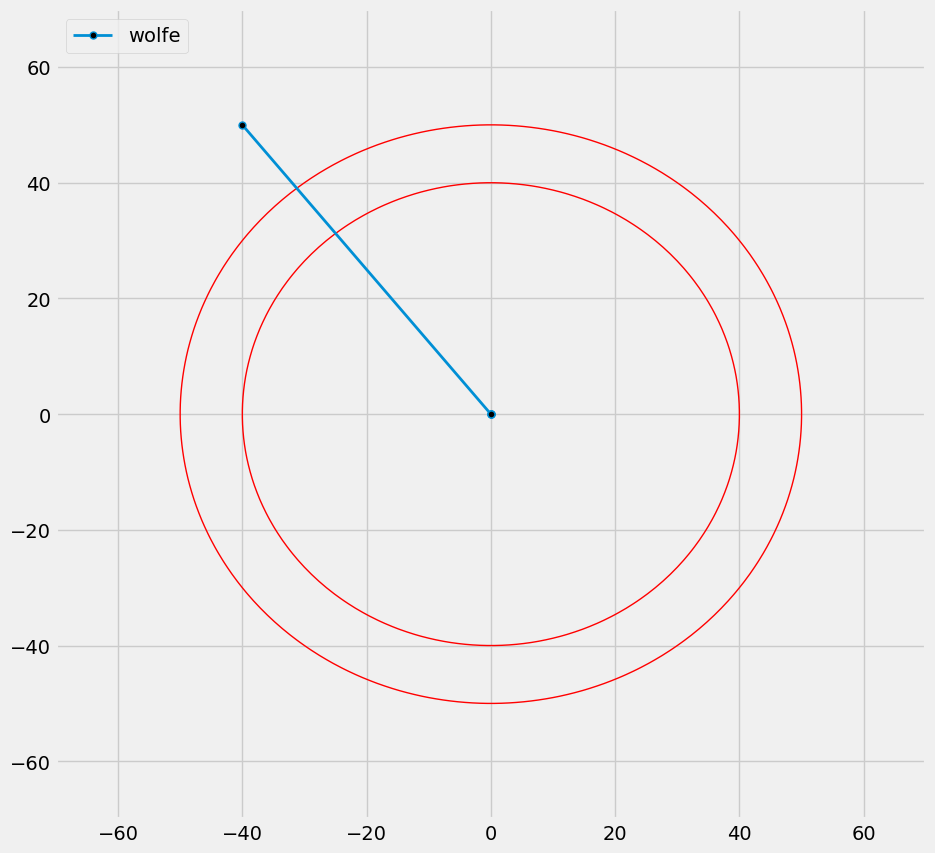

wolfe           ==>   0.000000 in [ -0.000000,  -0.000000]


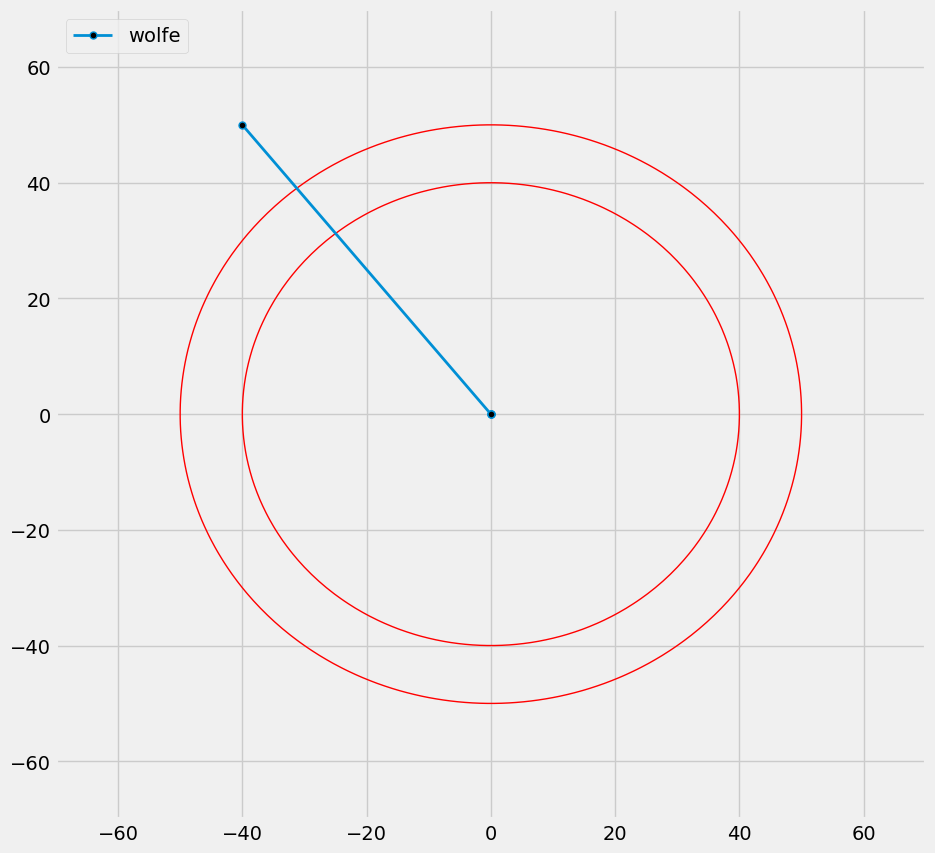

wolfe           ==>   0.000000 in [ -0.000000,  -0.000000]


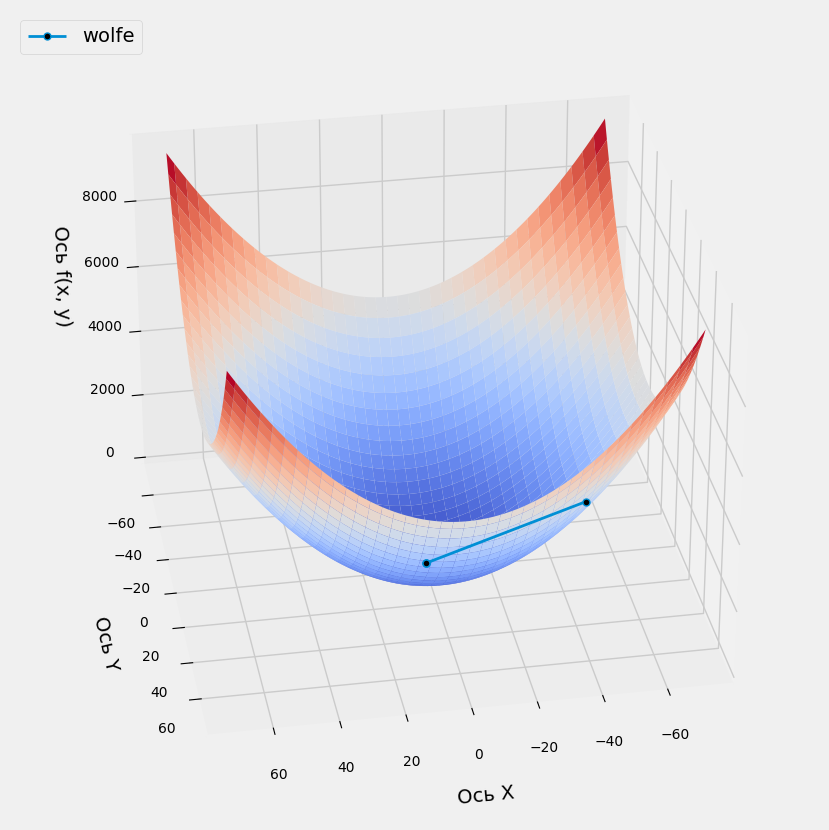

wolfe           ==>   0.000000 in [ -0.000000,  -0.000000]


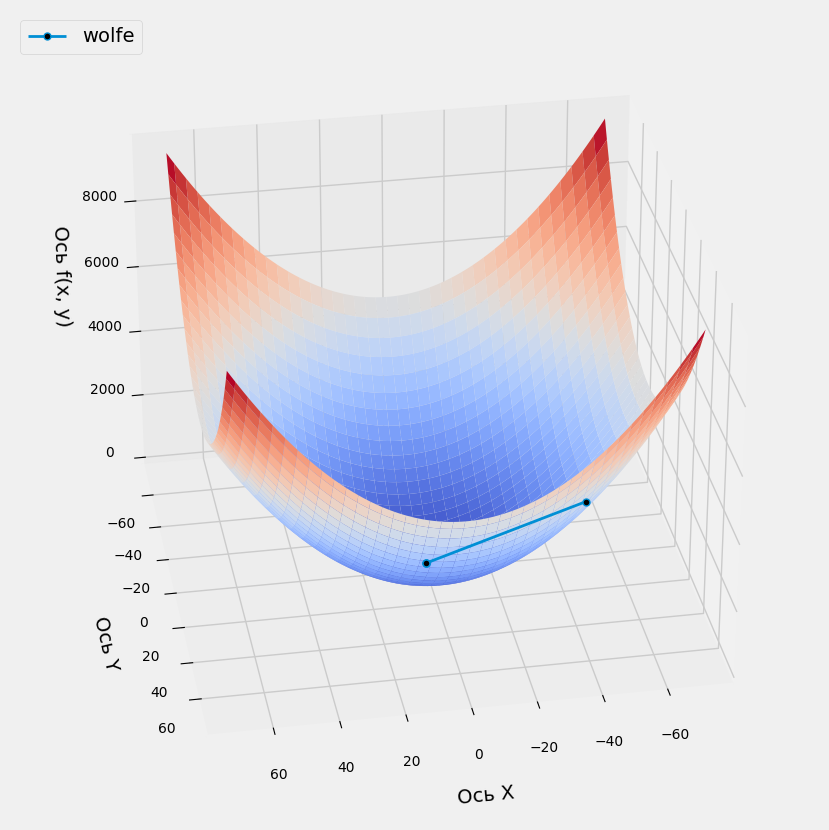

In [152]:
def f(x):
    return x[0] ** 2 + x[1] ** 2

xl = np.linspace(-70, 70, 120)
yl = np.linspace(-70, 70, 120)
X, Y = np.meshgrid(xl, yl)
Z = f(np.stack((X, Y)))

x_init = np.array([-40, 50], dtype=float)
num_iter = 100

result = [gradient_descent_wolfe(f, x_init, num_iterations=num_iter)]
result_label = ['wolfe']

print(result[-1], f(result[-1]))

print_lines_grad(result, result_label, title = '', filename = PATH_IMAGE + FILE_PREFIX + 'F1' + '_' + 'LINES', dpi = CNST_DPI_IMAGE)
print_lines_grad(result, result_label, title = '', filename = PATH_HQ + FILE_PREFIX + 'F1' + '_' + 'LINES' + '_' + 'HQ', dpi = CNST_DPI_HQ)
print_full_grad(result, result_label, title = '', filename = PATH_IMAGE + FILE_PREFIX + 'F1', dpi = CNST_DPI_IMAGE)
print_full_grad(result, result_label, title = '', filename = PATH_HQ + FILE_PREFIX + 'F1' + '_' + 'HQ', dpi = CNST_DPI_HQ)